In [1]:
# Descarga tu repositorio desde GitHub
#!git clone git@github.com:Guesseppe100/Perceptron.git


In [2]:
%pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow
from tensorflow.keras.datasets import mnist

Note: you may need to restart the kernel to use updated packages.


In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
train_data.shape

(60000, 28, 28)

In [6]:
test_data.shape

(10000, 28, 28)

In [7]:
train_data[0].shape

(28, 28)

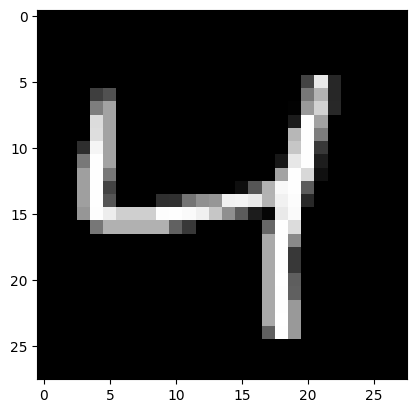

In [8]:
plt.imshow(train_data[2], cmap='gray')

In [9]:
train_data = train_data.reshape((60000, 28 * 28))
train_data = train_data.astype('float32') / 255

In [10]:
train_data[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
test_data = test_data.reshape((10000, 28 * 28))
test_data = test_data.astype('float32') / 255

In [12]:
test_data[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model = keras.Sequential([
    keras.layers.Input(shape=(28 * 28,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='rmsprop'  ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_data, train_labels, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8707 - loss: 0.4452
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9668 - loss: 0.1155
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9794 - loss: 0.0721
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9847 - loss: 0.0490
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9904 - loss: 0.0350


In [17]:
test_digits = test_data[0:10]
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [18]:
test_labels[0]

np.uint8(7)

In [19]:
predictions[0].argmax()

np.int64(7)

In [20]:
predictions[0].shape

(10,)

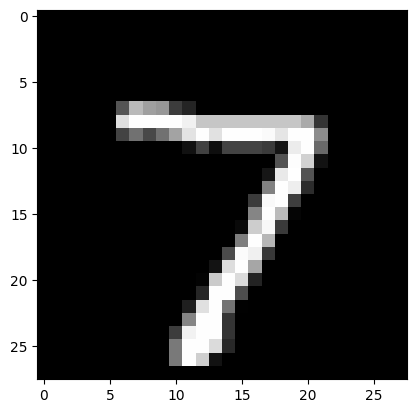

In [21]:
test_image = test_digits[0].reshape(28, 28)
plt.imshow(test_image, cmap='gray')